# Trip Advisor Review of East Asia

Analyze the review destination in East Asia by Clustering Algorithm (Unsupervised Learning).


---



About dataset:
This data set is populated by crawling TripAdvisor.com. Reviews on destinations in 10 categories mentioned across East Asia are considered. Each traveler rating is mapped as Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0) and average rating is used against each category per user.

* Attribute 1 : Unique user id
* Attribute 2 : Average user feedback on art galleries
* Attribute 3 : Average user feedback on dance clubs
* Attribute 4 : Average user feedback on juice bars
* Attribute 5 : Average user feedback on restaurants
* Attribute 6 : Average user feedback on museums
* Attribute 7 : Average user feedback on resorts
* Attribute 8 : Average user feedback on parks/picnic spots
* Attribute 9 : Average user feedback on beaches
* Attribute 10 : Average user feedback on theaters
* Attribute 11 : Average user feedback on religious institutions

Source data: https://archive.ics.uci.edu/ml/datasets/Travel+Reviews

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numpy version :  1.21.5
pandas version :  1.3.5
seaborn version :  0.11.2


## Import Datasets

In [2]:
# Import csv dataset

df=pd.read_csv("/content/drive/MyDrive/DATA COURSE DIBIMBING/PORTO/TripAdvisor Review/tripadvisor_review.csv")


In [3]:
df.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


## Data Cleansing






In [4]:
# Rename the column data according to the destinations
df=df.rename(columns = {'Category 1' : 'art_gallery',
                     'Category 2' : 'dance_club',
                     'Category 3' : 'juice_bar',
                     'Category 4' : 'restaurants',
                     'Category 5' : 'museums',
                     'Category 6' : 'resorts',
                     'Category 7' : 'parks',
                     'Category 8' : 'beaches',
                     'Category 9' : 'theaters',
                     'Category 10' : 'religious_inst'})

In [5]:
# general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         980 non-null    object 
 1   art_gallery     980 non-null    float64
 2   dance_club      980 non-null    float64
 3   juice_bar       980 non-null    float64
 4   restaurants     980 non-null    float64
 5   museums         980 non-null    float64
 6   resorts         980 non-null    float64
 7   parks           980 non-null    float64
 8   beaches         980 non-null    float64
 9   theaters        980 non-null    float64
 10  religious_inst  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


Almost all of the data types are numeric, except the `User ID`.

In [6]:
# missing values check
df.isna().sum()

User ID           0
art_gallery       0
dance_club        0
juice_bar         0
restaurants       0
museums           0
resorts           0
parks             0
beaches           0
theaters          0
religious_inst    0
dtype: int64

In [7]:
# Duplicated data check
df.duplicated().sum()

0

## Data Understanding

In [8]:
# Data describe
df.describe()

,art_gallery,dance_club,juice_bar,restaurants,museums,resorts,parks,beaches,theaters,religious_inst
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


Generally, mean and median value for the destinations review is quite low, even the dance club has 0 point. Parks gain highest mean value, 3.18, which means very good.

In [9]:
# Drop User ID since it is insignificant features for analysis
df=df.drop(['User ID'], axis = 1)

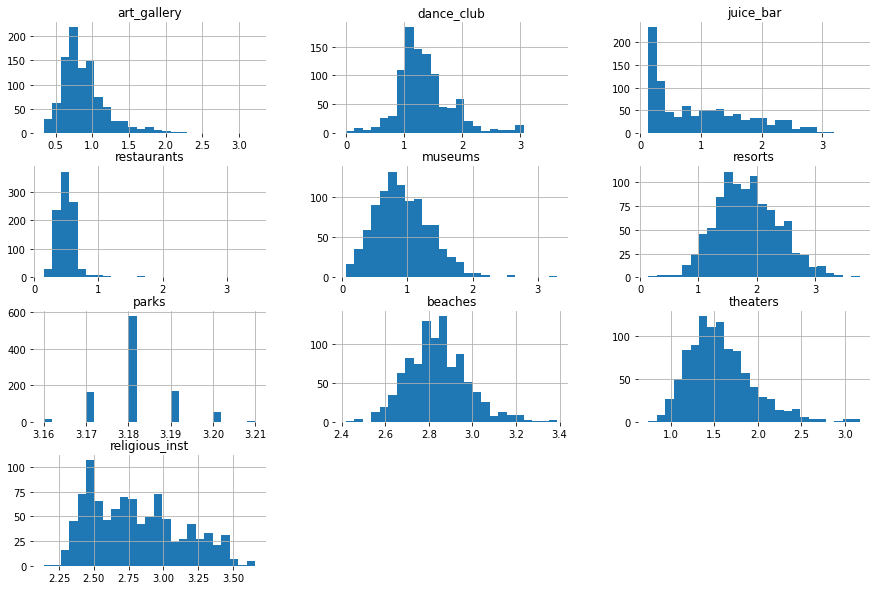

In [10]:
# data distribution
h = df.hist(bins=25,figsize=(15,10),xlabelsize='10',ylabelsize='10',xrot=0)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

Note:
* Restaurant most likely accept poor review
* Religious institution has distribution range wider than other features

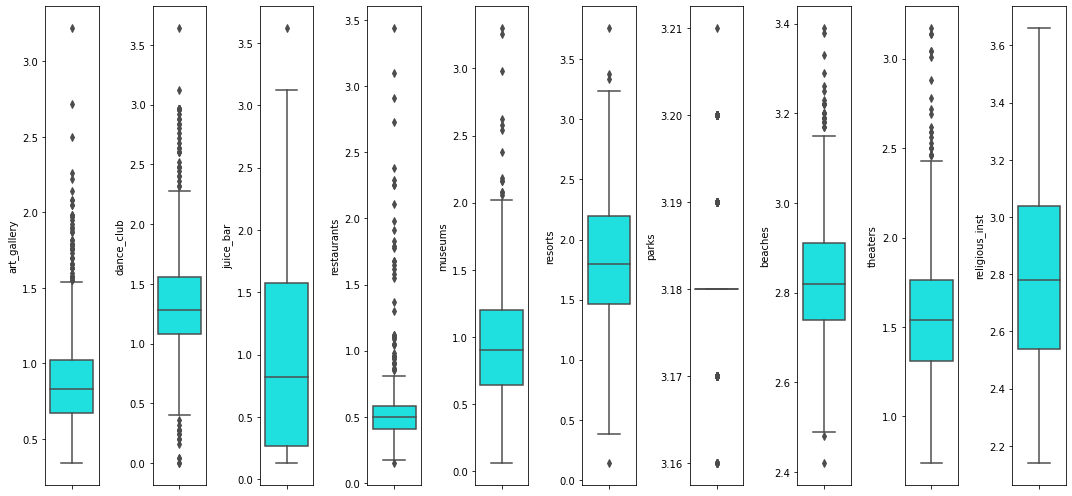

In [11]:
# Outlier check
feat_num = list(df)

plt.figure(figsize=(15, 7))
for i in range(0, len(feat_num)):
    plt.subplot(1, 10, i+1)
    sns.boxplot(y=df[feat_num[i]],color='cyan',orient='v')
    plt.tight_layout()

Parks and religious institutions accept better score among others.

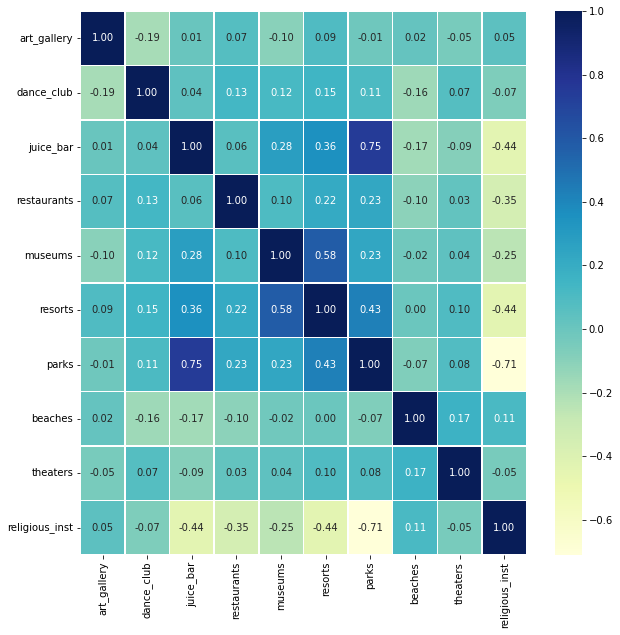

In [12]:
# correlation heatmap
correlation = df.corr()

fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(correlation, annot=True, fmt='.2f', linewidth=.5, cmap='YlGnBu', ax=ax)

Notes:
* Juice bar and park has high correlation (0.75)
* Park and religion institution is the second high correlation (abs 0.71)

## Modelling

In [13]:
# tune the k value
# track sum of squared error (SSE)
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

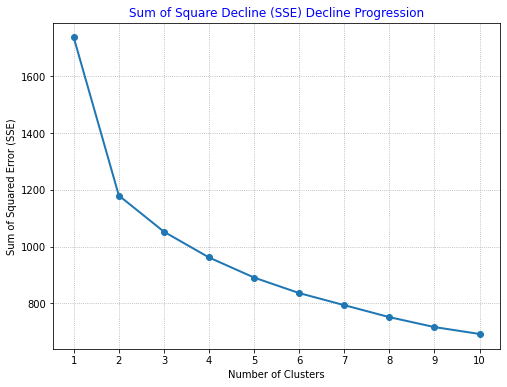

In [24]:
# draw the SSE decline progression
plt.figure(figsize = (8,6))
plt.plot(range(1,11), sse, linewidth=2.0, marker='o')
plt.title('Sum of Square Decline (SSE) Decline Progression', color='blue')
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error (SSE)')
plt.grid(color = 'darkgray', linestyle=':')
plt.show()

The "elbow" shown in number 2, then it can be used as optimal value of K for Kmeans.

In [15]:
# run kmeans with the optimal K
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(n_clusters=2)

In [25]:
# cluster centroid analysis
df['cluster'] = kmeans.labels_
centroid_df = df.groupby('cluster')[['art_gallery', 'dance_club','juice_bar','restaurants','museums','resorts','parks','beaches','theaters','religious_inst']].agg({
    'art_gallery':'mean','dance_club':'mean','juice_bar':'mean','restaurants':'mean','museums':'mean','resorts':'mean','parks':'mean','beaches':'mean','theaters':'mean',
    'religious_inst':'mean'}).reset_index()
centroid_df

,cluster,art_gallery,dance_club,juice_bar,restaurants,museums,resorts,parks,beaches,theaters,religious_inst
0,0,0.885017,1.309900,0.491990,0.500368,0.786254,1.625284,3.176973,2.854331,1.597124,2.925485
1,1,0.905995,1.419476,1.829398,0.582801,1.180000,2.183560,3.187147,2.804895,1.526099,2.601571


Cluster 1 gives slightly higher review scores on beaches, theaters, and religious institution. Meanwhile, cluster 0 gives higher review on art gallery, dance club, juice bar, restaurant, museum, and resort.

In [29]:
# Visualization using PCA
# Convert dimension into two parts using PCA
pca = PCA(n_components=2)

pca.fit(df)
pcs = pca.transform(df)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = df['cluster']
data_pca.head()

,PC 1,PC 2,clusters
0,1.515141,-0.041043,1
1,2.248169,0.709044,1
2,-0.775395,-0.518479,0
3,-0.934908,0.119474,0
4,0.653929,0.191590,1


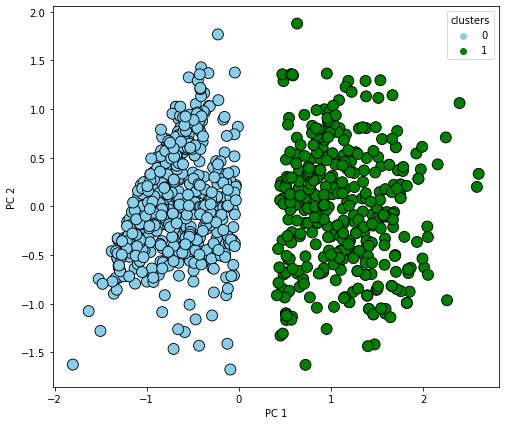

In [38]:
# Visualize the result
fig, ax = plt.subplots(figsize=(8,7))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='-',
    data=data_pca,
    palette=['skyblue','green'],
    s=120,
    ax=ax
)

## Summary

Overall, the reviews given to destinations are terrible (0) to very good (3.7). The results of the review are divided into two clusters where first (cluster 0) has high `beach`, `theater`, `religion institution` value the second (cluster 1) has high `art gallery`, `dance club`, `juice bar`, `restaurant`, `museum`, and `resort` value.